### Алгоритм Дейкстры

- Алгоритм позволяет за время O(n^2) находить кратчайший путь из заданной вершины во все остальные вершины графа.
- Алгоритм позволяет также найти все связанные компоненты. Для этого нужно взять произвольную вершину графа в качестве стартовой. Запустить алгоритм и посмотреть на множество вершин в массиве fishka, где храняться вершины найденной компоненты. Далее нужно пересечь вершины графа с множеством fishka и выбрать в оставшемся множестве стартовую вершину. И т.д. пока не останется вершин в графе, не побывавших в массиве fishka.

In [1]:
def my_deikstra_pass(vs,vfin,edge_label = 'weight'):
    """
    vs - стартовая вершина
    vfin - list, список финальных вершин
    edge_label - метка реберных длин
    """

    v_dist = {vs:(0,vs)}
    go_to = {vs:(0,vs)}
    fishka =[]

    # Перенос фишки пока она не побывает во всех соседях финишной вершины?
    i=0
    while len(go_to)>0: 
        vf = sorted(go_to.items(), key=lambda kv: kv[1])[0][0]
        # Просмотр всех соседей фишки и обновление вершин
        dist_vf = go_to[vf][0]
        for vn in G.neighbors(vf):
            if vn not in fishka:
                d = dist_vf + G[vf][vn][edge_label] if type(edge_label) == type('edge_label') else (dist_vf + 1)
                try:
                    if v_dist[vn][0] > d:
                        v_dist[vn] = (d,vf)
                        go_to[vn] = (d,vf)
                except:
                    v_dist.update({vn:(d,vf)})
                    go_to.update({vn:(d,vf)})

        fishka.append(vf)
        go_to.pop(vf)
        i+=1
        
    #v_dist = dict(sorted(v_dist.items(), key=lambda kv: kv[1]))
    
    # Восстановление пути
    trace = {}
    for vend in vfin:
        if vend in v_dist:
            trace.update({vend:{'rout':[vend],'dist':v_dist[vend][0]}})
            v_next = v_dist[vend][1]
            while v_next != vs:
                trace[vend]['rout'].append(v_next)
                v_next = v_dist[v_next][1]
            trace[vend]['rout'].append(vs)
            trace[vend]['rout']=trace[vend]['rout'][::-1]    

        else:
            trace.update({vend:{'rout':[vend],'dist': None }})
    
    return trace

## Применение алгоритма в дискретной оптимизации. `Динамическое программирование`

Компания хочет выполнить дополнительную работу в течение 5 месяцев. Она решила, что для выполнения задачи ей нужно иметь в 1й месяц 10 сотрудников, во 2й - 7, в 3й - 9, в 4й - 8 и в 5й - 11. 
При этом она несет затраты:
- на обучение 800 евро/ч
- на увольнение 1200 евро/ч
- на лишнего сотрудника 1600 евро/мес.

Теперь ей нужно решить какое дополнительное количество сотрудников нанять, чтобы общие затраты были минимальные.

Понятно, что в любой месяц в компании должно быть не менее $b_i$ и не более 11 сотрудников.

- Вершины графа: $V:=\{(i,x)| i=1,...,5; b_i \leq x \leq 11\} \cup \{(0,0),(6,0)\}$

- Ребра графа: $E := \{(v_i,v_{i+1}) \in V \times V | i \in 0,...,5\}$

- Веса ребер: $$ 
\begin{equation*}
W(v_i,v_{i+1}) = 
 \begin{cases}
   8(y-x)+16(y-b_{i+1}) , y \geq x \\
   12(x-y)+16(y-b_{i+1}) , y < x 
 \end{cases}
\end{equation*}
$$

**Задача решается нахождением минимального маршрута в графе G(V,E) между вершинами (0,0) и (6,0) с помощью `алгоритма Дейкстры`.**

In [5]:
import networkx as nx
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# число требуемых сотрудников
B = [0, 10, 7, 9, 8, 11, 0]

# Зададим вершины [мес, число сотр]
V = [(0,0)]
n=1
for i in range(1,6):
    for j in range(B[i],12):
        V.append((i,j))
        n+=1
V.append((6,0))
V[:3]

[(0, 0), (1, 10), (1, 11)]

In [3]:
# Зададим ребра и их веса
E = []
i = 0
for i in range(0,6):
    VX = [v for v in V if v[0]==i]
    VY = [v for v in V if v[0]==i+1]
    for v in VX:
        x=v[1]
        for u in VY:
            y=u[1]
            if y>=x:
                E.append((v,u, {'weight': 8*(y - x) + 16* (y-B[i+1])} )) 
            else:
                E.append((v,u, {'weight': 12*(x - y) + 16* (y-B[i+1])} ))
E[:3]

[((0, 0), (1, 10), {'weight': 80}),
 ((0, 0), (1, 11), {'weight': 104}),
 ((1, 10), (2, 7), {'weight': 36})]

In [8]:
G = nx.Graph()
G.add_nodes_from(V)
G.add_edges_from(E)

# Позиции вершин
pos = {}
for v in V:
    if v[1] > 0:
        pos.update({v:np.array([v[0],v[1]])})
    elif v[1] == 0:
        pos.update({v:np.array([v[0],6])})
        
# Словарь весов вершин
my_weight = {(u,v):G[u][v]['weight'] for u,v in G.edges()}

In [9]:
# Дискретная оптимизация
myprobl = my_deikstra_pass((0,0),[(6,0)])[(6,0)]

rout = myprobl['rout'] # маршрут по вершинам 
Erout = [(rout[i],rout[i+1]) for i in range(6)] # маршрут по ребрам

probl_val = myprobl['dist'] # суммарный путь по весам
empls = [ k[1] for k in rout]

print(f'Число нанятых по месяцам: {empls} с общей минимальной стоимостью {probl_val*100} евро')

Число нанятых по месяцам: [0, 10, 9, 9, 9, 11, 0] с общей минимальной стоимостью 28800 евро


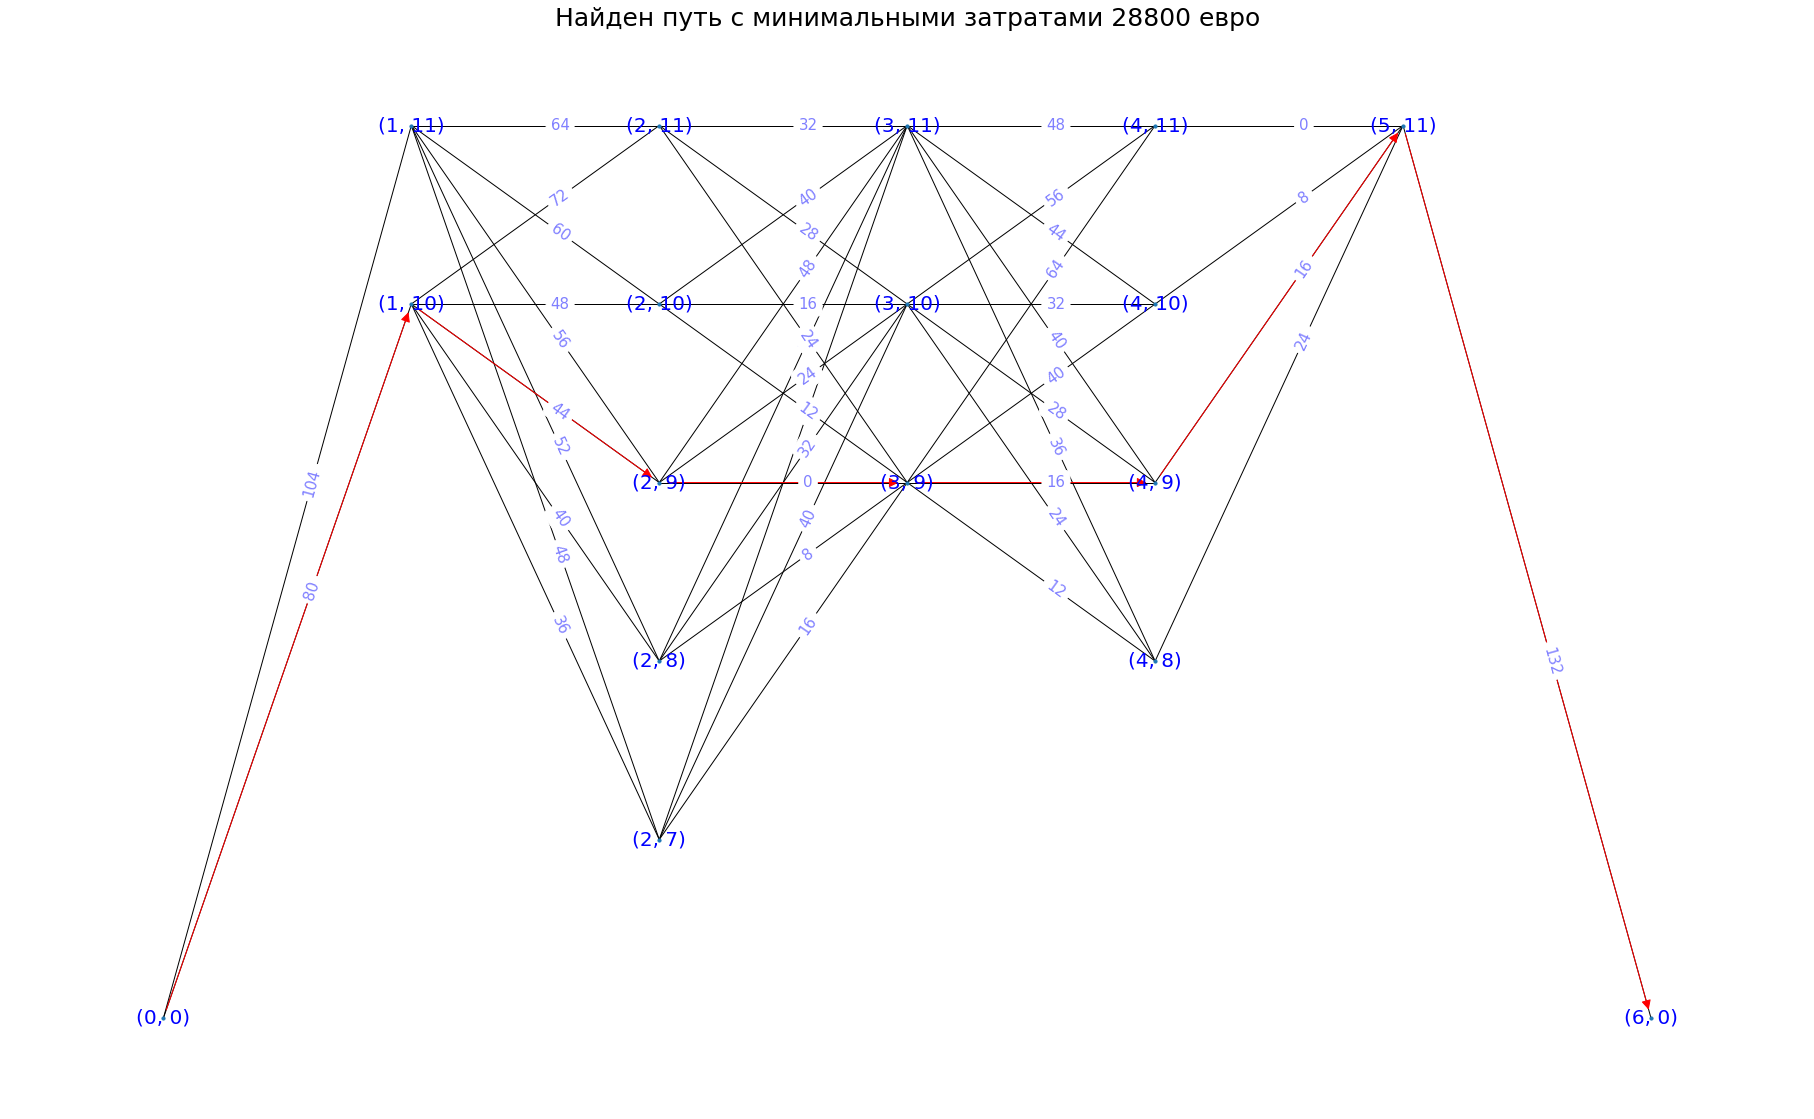

In [10]:
# графики
plt.figure(figsize=(25,15))
nx.draw(G,pos,node_size=10,with_labels=True,font_color='b',font_size=20)
nx.draw_networkx_edge_labels(G,pos,edge_labels=my_weight,font_color='b',alpha = 0.5, label_pos =0.4, verticalalignment = 'center',horizontalalignment='center',font_size=15);

nx.draw_networkx_edges(G,pos,edgelist = Erout,edge_color='r',arrowstyle='-|>', arrowsize=20, arrows = True)
plt.title(f'Найден путь с минимальными затратами {probl_val*100} евро',fontsize=25)
plt.show()